In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
import kagglehub


path = kagglehub.dataset_download("uciml/electric-power-consumption-data-set")

print("Path to dataset files:", path)

100%|██████████| 19.4M/19.4M [00:01<00:00, 13.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/electric-power-consumption-data-set/versions/1


In [4]:
import pandas as pd
import os

data_dir = path
file_name = 'household_power_consumption.txt'
file_path = os.path.join(data_dir, file_name)


saldf = pd.read_csv(file_path, sep=';')
saldf.head()

/tmp/ipython-input-4083511149.py:9: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  saldf = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
saldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
saldf.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [7]:

saldf['Global_active_power'] = pd.to_numeric(saldf['Global_active_power'], errors='coerce')


inp = saldf[['Global_active_power']]
out = saldf['Sub_metering_3']

In [8]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [9]:

df_combined = pd.concat([inp, out], axis=1)

df_valid = df_combined.dropna()


inp_valid = df_valid[['Global_active_power']]
out_valid = df_valid['Sub_metering_3']


LR.fit(inp_valid, out_valid)

LinearRegression()

In [10]:
prediction = LR.predict([[5]])
print("Prediction for Global_active_power = 5:", prediction)


Prediction for Global_active_power = 5: [26.37417]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


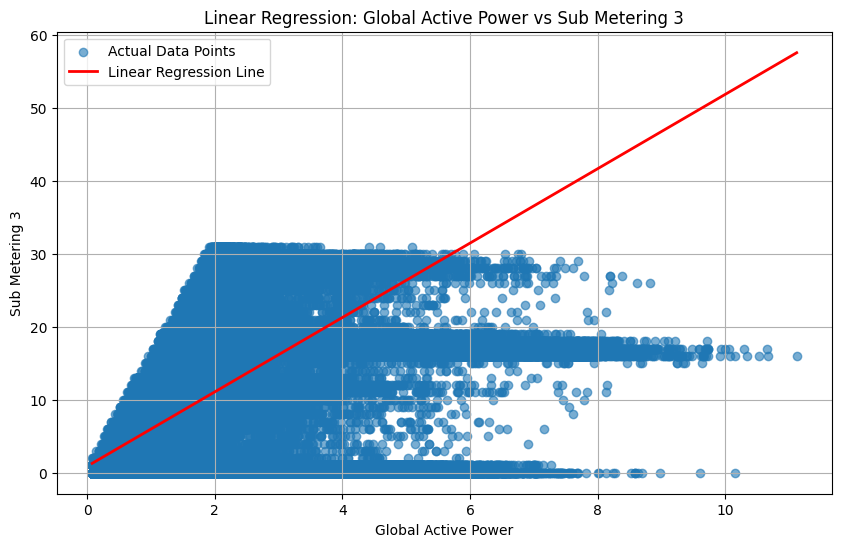

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(10,6))

# Scatter plot of actual values
plt.scatter(inp_valid, out_valid, label='Actual Data Points', alpha=0.6)

# Generate points for the regression line
x_range = np.linspace(inp_valid.min(), inp_valid.max(), 100).reshape(-1, 1)
y_pred_line = LR.predict(x_range)

# Plot the regression line
plt.plot(x_range, y_pred_line, color='red', linewidth=2, label='Linear Regression Line')

# Update title and labels
plt.title('Linear Regression: Global Active Power vs Sub Metering 3')
plt.xlabel('Global Active Power')
plt.ylabel('Sub Metering 3')
plt.legend()
plt.grid(True)
plt.show()